# LSTM sequence to sequence model approach

* This approach uses a simple encoder/decoder LSTM approach 
* stacked LSTMS
* bidirectional

In [1]:
import torch
import torch.nn as nn
import numpy as np
from models.lstm_seq import LSTMPredictor
from data import OhioData
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from tqdm import tqdm


# Parameters

* I just tried out a few parameters
* One can optimize them by using hyper parameter search metrics (baysian parameter optimization)

In [2]:
# parameters

epochs = 250
n_batches = 1024
input_dim = 24
n_features = 11
n_layers = 2
bidirectional = True
output_dim = 6
amount_fc = 3
hidden_dim = 10
early_stopping_counter = 10

lr = 1e-4

# Loading data

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

val_data = OhioData(mode="validation", h=output_dim)

train_data = OhioData(h=output_dim)

# Utils
* Plots the prediction and the label of a single example

In [4]:
def plot_example(y, y_pred, inp, scale_factor=400):
    with torch.no_grad():
        idx_list = list(range(len(inp) + len(y)))
        y_pred *= scale_factor
        inp = np.append(inp, y) * scale_factor
        fig, ax = plt.subplots(1)
        ax.plot(idx_list, inp, label="Input + Label")
        ax.plot(idx_list[-output_dim:], y_pred, label="Predicted Label")
        ax.legend()
        ax.set_title("Predicted vs actual future")
    return fig

* The input is reshaped to: (sequence length, batch_size, features)
* Data[0, 0, :] describes the data of a single time step

In [5]:
def prepare_data(batch):
    batch = batch.reshape(batch.shape[0], input_dim, n_features).permute(1, 0, 2)
    return batch

# Training Loop

In [6]:
train_loader = DataLoader(train_data, batch_size=n_batches, shuffle=True, num_workers=0)
val_loader = DataLoader(val_data, batch_size=n_batches, shuffle=False, num_workers=0)

model = LSTMPredictor(input_size=n_features, hidden_size=hidden_dim, num_layers=n_layers, prediction_horizon=output_dim, bidirectional=bidirectional).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=.5, patience=3)
scheduler2 = optim.lr_scheduler.ExponentialLR(optimizer, gamma=.99)

## Approach
1. Vizualize prediction of the current model
2. Run model on validation set
3. Train on train data
   
## Notes
* Early stopping is used 
* Two separate lr schedulers are used

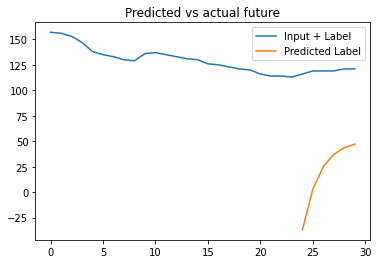

[Training:0] Total Loss: 110.72 Loss: 83.63: 100%|██████████| 95/95 [00:21<00:00,  4.38it/s]


tensor([0.0882, 0.1480, 0.1783, 0.1864, 0.1725, 0.1268], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5650, 0.5625, 0.5525, 0.5550, 0.5525, 0.5525], device='cuda:0')


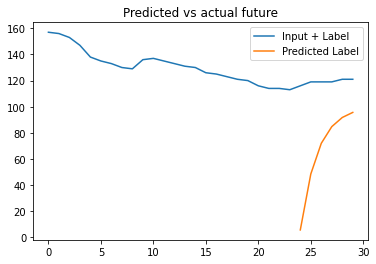

[Training:1] Total Loss: 54.41 Loss: 34.57: 100%|██████████| 95/95 [00:19<00:00,  4.76it/s]

tensor([0.2318, 0.2862, 0.3146, 0.3219, 0.3050, 0.2497], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2225, 0.2325, 0.2425, 0.2525, 0.2650, 0.2775], device='cuda:0')


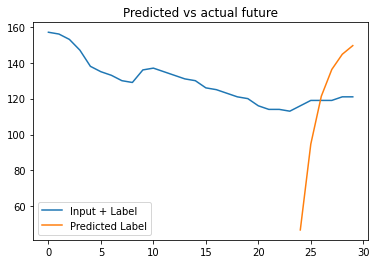

[Training:2] Total Loss: 26.82 Loss: 19.10: 100%|██████████| 95/95 [00:20<00:00,  4.58it/s]


tensor([0.3247, 0.3814, 0.4112, 0.4194, 0.4016, 0.3416], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2750, 0.2750, 0.2700, 0.2750, 0.2725, 0.2725], device='cuda:0')


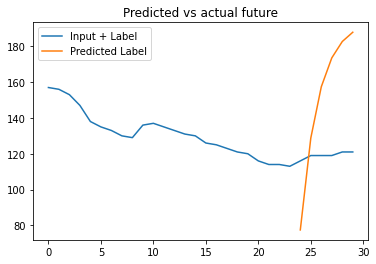

[Training:3] Total Loss: 21.79 Loss: 20.04: 100%|██████████| 95/95 [00:20<00:00,  4.56it/s]


tensor([0.3153, 0.3778, 0.4097, 0.4177, 0.3996, 0.3412], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3400, 0.3375, 0.3400, 0.3375, 0.3325, 0.3375], device='cuda:0')


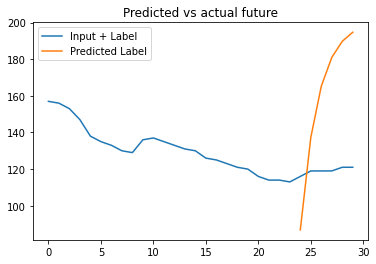

[Training:4] Total Loss: 21.00 Loss: 20.56: 100%|██████████| 95/95 [00:19<00:00,  4.81it/s]

tensor([0.3926, 0.4479, 0.4759, 0.4812, 0.4595, 0.3953], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.8325, 0.8250, 0.8400, 0.8500, 0.8925, 0.9150], device='cuda:0')


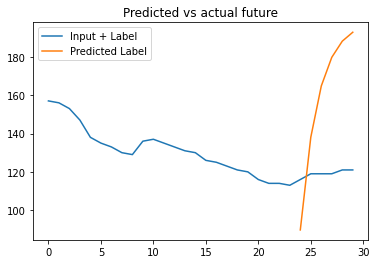

[Training:5] Total Loss: 20.19 Loss: 18.73: 100%|██████████| 95/95 [00:19<00:00,  4.83it/s]

tensor([0.3386, 0.3944, 0.4217, 0.4266, 0.4068, 0.3500], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4950, 0.5100, 0.5175, 0.5200, 0.5150, 0.5000], device='cuda:0')


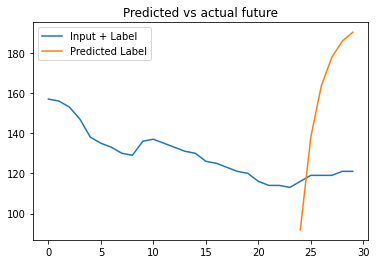

[Training:6] Total Loss: 19.24 Loss: 19.06: 100%|██████████| 95/95 [00:19<00:00,  4.88it/s]

tensor([0.3529, 0.4022, 0.4267, 0.4324, 0.4163, 0.3652], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4025, 0.4025, 0.4000, 0.4025, 0.4025, 0.4000], device='cuda:0')


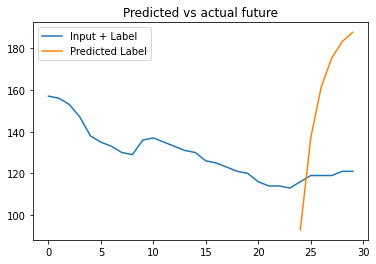

[Training:7] Total Loss: 18.02 Loss: 17.96: 100%|██████████| 95/95 [00:18<00:00,  5.00it/s]

tensor([0.3311, 0.3775, 0.4010, 0.4069, 0.3927, 0.3464], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3325, 0.3250, 0.3150, 0.3050, 0.2975, 0.2950], device='cuda:0')


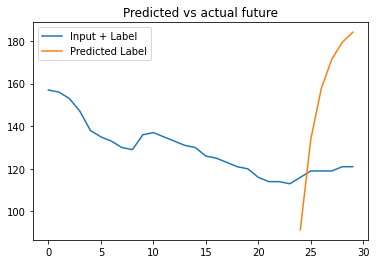

[Training:8] Total Loss: 16.35 Loss: 15.26: 100%|██████████| 95/95 [00:18<00:00,  5.11it/s]

tensor([0.4327, 0.4702, 0.4888, 0.4911, 0.4720, 0.4192], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6075, 0.6200, 0.6250, 0.6300, 0.6350, 0.6300], device='cuda:0')


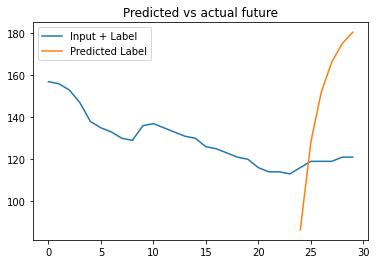

[Training:9] Total Loss: 13.99 Loss: 12.41: 100%|██████████| 95/95 [00:18<00:00,  5.03it/s]


tensor([0.3513, 0.3903, 0.4116, 0.4155, 0.3972, 0.3452], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4875, 0.4900, 0.4950, 0.4975, 0.4950, 0.4900], device='cuda:0')


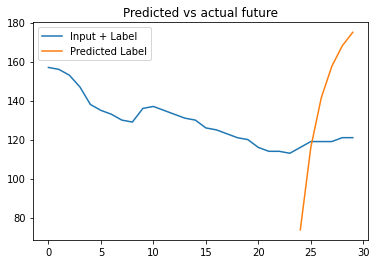

[Training:10] Total Loss: 10.91 Loss: 8.67: 100%|██████████| 95/95 [00:19<00:00,  4.96it/s] 

tensor([0.2869, 0.3288, 0.3557, 0.3661, 0.3553, 0.3118], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3925, 0.4025, 0.4075, 0.4175, 0.4275, 0.4325], device='cuda:0')


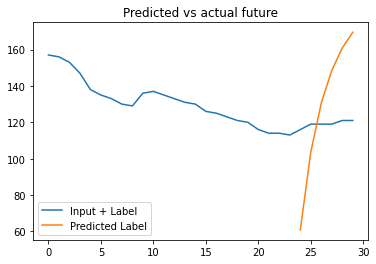

[Training:11] Total Loss: 8.22 Loss: 6.61: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.2710, 0.3054, 0.3297, 0.3446, 0.3462, 0.3242], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.1625, 0.1700, 0.1700, 0.1700, 0.1700, 0.1650], device='cuda:0')


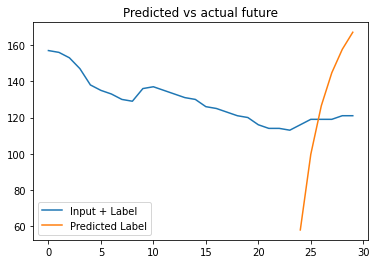

[Training:12] Total Loss: 6.36 Loss: 5.22: 100%|██████████| 95/95 [00:20<00:00,  4.59it/s]


tensor([0.2803, 0.3181, 0.3428, 0.3558, 0.3540, 0.3271], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3325, 0.3300, 0.3250, 0.3250, 0.3225, 0.3200], device='cuda:0')


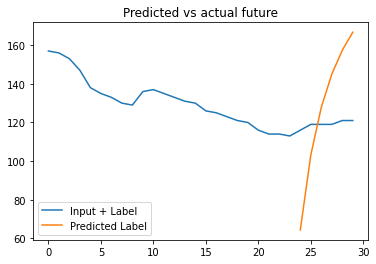

[Training:13] Total Loss: 4.92 Loss: 4.78: 100%|██████████| 95/95 [00:21<00:00,  4.49it/s]


tensor([0.3955, 0.4156, 0.4265, 0.4282, 0.4165, 0.3810], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4500, 0.4375, 0.4300, 0.4250, 0.4350, 0.4375], device='cuda:0')


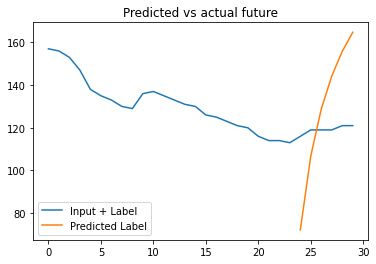

[Training:14] Total Loss: 3.77 Loss: 3.44: 100%|██████████| 95/95 [00:20<00:00,  4.60it/s]


tensor([0.3515, 0.3616, 0.3663, 0.3658, 0.3554, 0.3268], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3750, 0.3750, 0.3650, 0.3675, 0.3700, 0.3675], device='cuda:0')


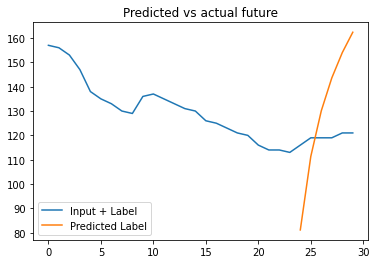

[Training:15] Total Loss: 2.88 Loss: 2.94: 100%|██████████| 95/95 [00:20<00:00,  4.59it/s]


tensor([0.3220, 0.3338, 0.3419, 0.3487, 0.3511, 0.3428], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2575, 0.2700, 0.2750, 0.2850, 0.2850, 0.2700], device='cuda:0')


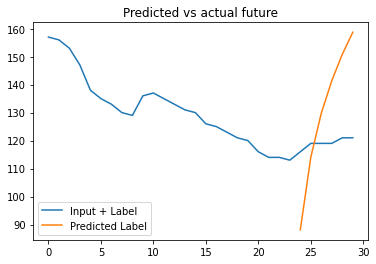

[Training:16] Total Loss: 2.22 Loss: 2.00: 100%|██████████| 95/95 [00:20<00:00,  4.58it/s]


tensor([0.4348, 0.4420, 0.4567, 0.4723, 0.4761, 0.4448], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4275, 0.4250, 0.4300, 0.4300, 0.4350, 0.4450], device='cuda:0')


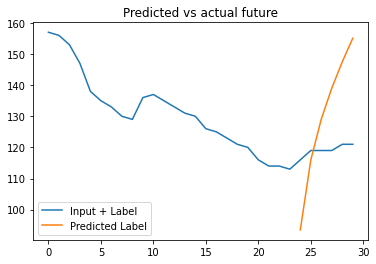

[Training:17] Total Loss: 1.76 Loss: 1.77: 100%|██████████| 95/95 [00:20<00:00,  4.61it/s]


tensor([0.2728, 0.2748, 0.2785, 0.2840, 0.2886, 0.2851], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2400, 0.2350, 0.2525, 0.2675, 0.2850, 0.2600], device='cuda:0')


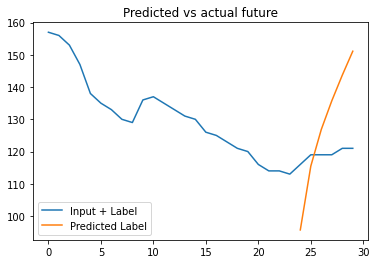

[Training:18] Total Loss: 1.44 Loss: 1.33: 100%|██████████| 95/95 [00:20<00:00,  4.53it/s]


tensor([0.5998, 0.6289, 0.6390, 0.6355, 0.6197, 0.5882], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6175, 0.6150, 0.6125, 0.6075, 0.6050, 0.6000], device='cuda:0')


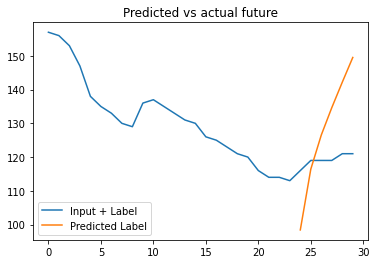

[Training:19] Total Loss: 1.21 Loss: 1.01: 100%|██████████| 95/95 [00:20<00:00,  4.59it/s]


tensor([0.3024, 0.2895, 0.2846, 0.2872, 0.2934, 0.2986], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2725, 0.2675, 0.2650, 0.2800, 0.2775, 0.2725], device='cuda:0')


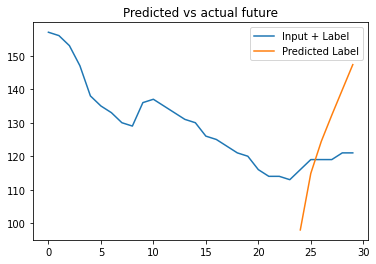

[Training:20] Total Loss: 1.04 Loss: 1.01: 100%|██████████| 95/95 [00:20<00:00,  4.59it/s]


tensor([0.5971, 0.6285, 0.6434, 0.6449, 0.6332, 0.6067], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6225, 0.6300, 0.6300, 0.6350, 0.6350, 0.6300], device='cuda:0')


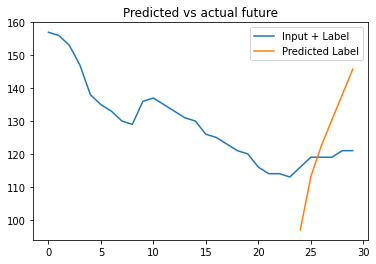

[Training:21] Total Loss: 0.92 Loss: 0.89: 100%|██████████| 95/95 [00:20<00:00,  4.62it/s]


tensor([0.2598, 0.2512, 0.2454, 0.2441, 0.2461, 0.2483], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2350, 0.2300, 0.2275, 0.2275, 0.2300, 0.2300], device='cuda:0')


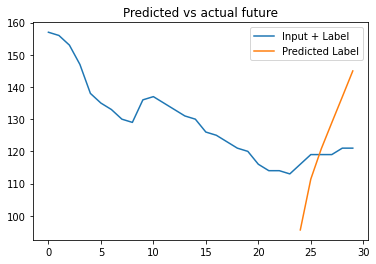

[Training:22] Total Loss: 0.82 Loss: 0.77: 100%|██████████| 95/95 [00:21<00:00,  4.49it/s]


tensor([0.4266, 0.4321, 0.4409, 0.4512, 0.4589, 0.4599], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4175, 0.4250, 0.4400, 0.4600, 0.4725, 0.4825], device='cuda:0')


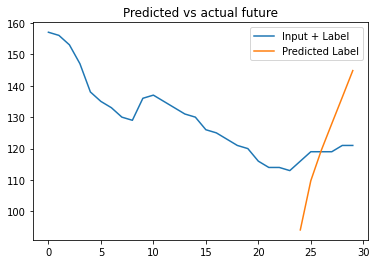

[Training:23] Total Loss: 0.75 Loss: 0.70: 100%|██████████| 95/95 [00:20<00:00,  4.53it/s]


tensor([0.2799, 0.2751, 0.2722, 0.2727, 0.2754, 0.2804], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2725, 0.2700, 0.2750, 0.2850, 0.2825, 0.2925], device='cuda:0')


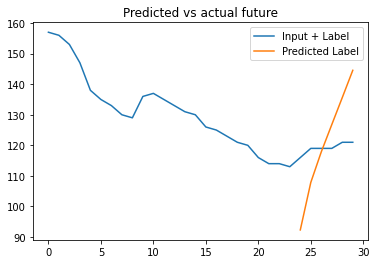

[Training:24] Total Loss: 0.69 Loss: 0.73: 100%|██████████| 95/95 [00:21<00:00,  4.46it/s]


tensor([0.7976, 0.8442, 0.8537, 0.8349, 0.7974, 0.7456], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.8525, 0.8425, 0.7800, 0.7375, 0.7700, 0.7650], device='cuda:0')


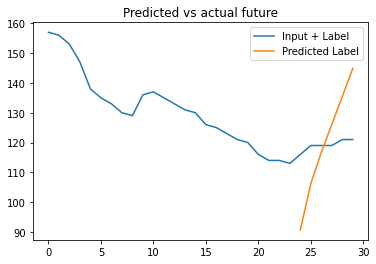

[Training:25] Total Loss: 0.66 Loss: 0.70: 100%|██████████| 95/95 [00:21<00:00,  4.45it/s]


tensor([0.2873, 0.2845, 0.2832, 0.2846, 0.2883, 0.2942], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2700, 0.2750, 0.2850, 0.2925, 0.2950, 0.2975], device='cuda:0')


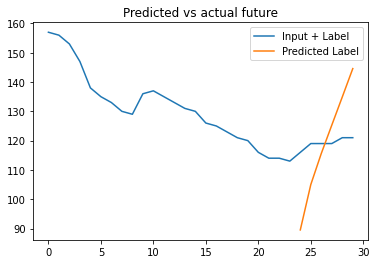

[Training:26] Total Loss: 0.64 Loss: 0.60: 100%|██████████| 95/95 [00:21<00:00,  4.48it/s]


tensor([0.2632, 0.2549, 0.2507, 0.2511, 0.2570, 0.2690], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2875, 0.2775, 0.2650, 0.2525, 0.2475, 0.2400], device='cuda:0')


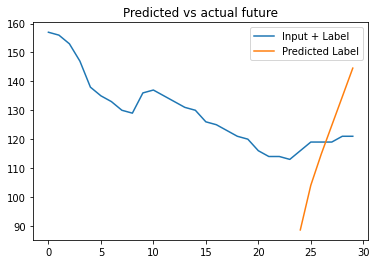

[Training:27] Total Loss: 0.62 Loss: 0.67: 100%|██████████| 95/95 [00:20<00:00,  4.63it/s]


tensor([0.3378, 0.3362, 0.3341, 0.3324, 0.3314, 0.3321], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3250, 0.3275, 0.3450, 0.3475, 0.3425, 0.3450], device='cuda:0')


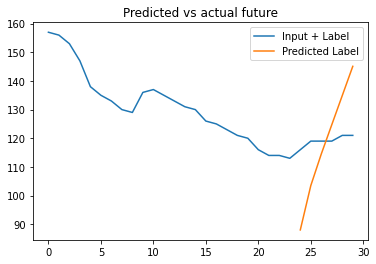

[Validation:27] Total Loss: 14.44 Loss: 8.35: 100%|██████████| 24/24 [00:04<00:00,  5.80it/s] 


In [7]:
train_losses = []
val_losses = []

torch.autograd.set_detect_anomaly(False)
loss_function = nn.MSELoss()
best_val_loss = torch.inf
stopping_counter = 0
for epoch in range(epochs):
    total_loss = 0
    with torch.no_grad():
        if epoch % 15 == 0:
            x, y, inp = val_data.get_first_example()
            x = torch.tensor(x).unsqueeze(0)
            x = prepare_data(x).to(device)
            model = model.eval()
            y = torch.tensor(y).unsqueeze(0).unsqueeze(2).to(device)
            y_pred = model(x, x[-1].unsqueeze(0)[:, :, 2].unsqueeze(2), teacher_force=False)[:, 0, 0].cpu().numpy()
            model = model.train()
            fig = plot_example(y.cpu().squeeze(), y_pred, inp, scale_factor=train_data.scale_max["cbg"])
            plt.show()
        with tqdm(val_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device).unsqueeze(2).permute(1, 0, 2)
                y_pred = model(x, x[-1].unsqueeze(0)[:, :, 2].unsqueeze(2), teacher_force=False)
                loss = loss_function(y_pred, y) * 1000
                val_loss = loss
                total_loss += loss.item()
                t.set_description(f"[Validation:{epoch - 1}] Total Loss: {total_loss / len(val_loader):.2f} Loss: {loss.item():.2f}")
    val_losses.append(total_loss / len(val_loader))
    if total_loss < best_val_loss:
        best_val_loss = total_loss
        torch.save(model.state_dict(), f"checkpoints/lstm_bid_stacked_best_{output_dim}.chkpt")
        stopping_counter = 0
    else: 
        stopping_counter += 1
        if stopping_counter >= early_stopping_counter:
            break
    total_loss = 0
    with tqdm(train_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)
            y = y.to(device).unsqueeze(2).permute(1, 0, 2)
            y_pred = model(x, y)[:, :, 0]
            y = y.permute(1, 0, 2)[:, :, 0]

            loss = loss_function(y_pred, y) * 1000
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            t.set_description(f"[Training:{epoch}] Total Loss: {total_loss / len(train_loader):.2f} Loss: {loss.item():.2f}")
        print(y_pred[0], y[0])
    train_losses.append(total_loss / len(train_loader))
    
    scheduler.step(val_loss)
    scheduler2.step()

# Plot Train/Val loss curves

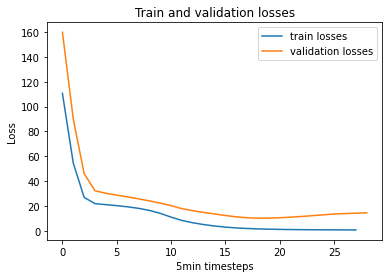

In [8]:
plt.plot(train_losses, label="train losses")
plt.plot(val_losses, label="validation losses")

plt.title(f"Train and validation losses")
plt.ylabel("Loss")
plt.xlabel("5min timesteps")
plt.legend()
plt.show()

# Evaluate on test set
* Calculate the rMSE and MAE values for 30min/60min prediction horizon

In [9]:
test_data = OhioData(mode="test", h=output_dim)
test_loader = DataLoader(test_data, batch_size=1, num_workers=0)

mse_loss = nn.MSELoss()
model = LSTMPredictor(input_size=n_features, hidden_size=hidden_dim, num_layers=n_layers, prediction_horizon=output_dim, bidirectional=bidirectional).to(device)

model.load_state_dict(torch.load(f"checkpoints/lstm_bid_stacked_best_{output_dim}.chkpt"))
model = model.eval().to(device)

In [10]:
total_loss = 0

with torch.no_grad():
    with tqdm(test_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)
            y = y.to(device).unsqueeze(2).permute(1, 0, 2)
            y_pred = model(x, x[-1].unsqueeze(0)[:, :, 2].unsqueeze(2), teacher_force=False)[:, :]
            # scale back to original range, because otherwise the results cannot bne compared to others
            y = y * train_data.scale_max["cbg"]
            y_pred = y_pred * train_data.scale_max["cbg"]
            loss = mse_loss(y_pred, y)
            total_loss += loss.item()
            t.set_description(f"Test Loss: {np.sqrt(total_loss / len(test_loader)):.2f}, Running Loss: {loss.item():.2f}")

print(f"Final rMSE: {np.sqrt(total_loss / len(test_loader))}")

Test Loss: 39.13, Running Loss: 4503.23: 100%|██████████| 28426/28426 [02:14<00:00, 211.37it/s] 

Final rMSE: 39.13250742279125


# Evaluate results per patient

In [11]:
patient_ids = [559, 563, 570, 575, 588, 591, 540, 544, 552, 567, 584, 596]

mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

In [13]:
maes = []
mses = []
with torch.no_grad():
    for id in patient_ids:
        total_mae = 0
        total_mse = 0
        test_data = OhioData(mode="test", patient_id=id, h=output_dim)
        test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device).unsqueeze(2).permute(1, 0, 2)
                y_pred = model(x, x[-1].unsqueeze(0)[:, :, 2].unsqueeze(2), teacher_force=False)[:, :]
                # y = y.permute(1, 0, 2)[:, :, 0]
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                mse = mse_loss(y_pred, y)
                mae = mae_loss(y_pred, y)
                total_mae += mae.item()
                total_mse += mse.item()
                t.set_description(f"Patient: {id}, rMSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        print(f"Results - Patient: {id}, rMSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        maes.append(total_mae / len(test_loader))
        mses.append(total_mse / len(test_loader))
print(f"Mean results - MAE: {sum(maes) / len(maes)}, rMSE: {np.sqrt(sum(mses) / len(mses))}")

Patient: 559, rMSE: 42.91, MAE: 33.49: 100%|██████████| 2142/2142 [00:11<00:00, 180.89it/s]


Results - Patient: 559, rMSE: 42.91, MAE: 33.49


Patient: 563, rMSE: 37.98, MAE: 30.51: 100%|██████████| 2446/2446 [00:12<00:00, 199.84it/s]


Results - Patient: 563, rMSE: 37.98, MAE: 30.51


Patient: 570, rMSE: 46.07, MAE: 37.36: 100%|██████████| 2435/2435 [00:11<00:00, 206.73it/s]


Results - Patient: 570, rMSE: 46.07, MAE: 37.36


Patient: 575, rMSE: 37.70, MAE: 29.91: 100%|██████████| 2249/2249 [00:09<00:00, 227.19it/s]


Results - Patient: 575, rMSE: 37.70, MAE: 29.91


Patient: 588, rMSE: 39.30, MAE: 31.69: 100%|██████████| 2698/2698 [00:12<00:00, 211.73it/s]


Results - Patient: 588, rMSE: 39.30, MAE: 31.69


Patient: 591, rMSE: 36.18, MAE: 29.18: 100%|██████████| 2605/2605 [00:12<00:00, 212.91it/s]


Results - Patient: 591, rMSE: 36.18, MAE: 29.18


Patient: 540, rMSE: 42.04, MAE: 32.89: 100%|██████████| 2617/2617 [00:11<00:00, 220.66it/s]


Results - Patient: 540, rMSE: 42.04, MAE: 32.89


Patient: 544, rMSE: 36.85, MAE: 29.83: 100%|██████████| 2499/2499 [00:12<00:00, 207.40it/s]


Results - Patient: 544, rMSE: 36.85, MAE: 29.83


Patient: 552, rMSE: 34.21, MAE: 27.51: 100%|██████████| 2023/2023 [00:09<00:00, 215.35it/s]


Results - Patient: 552, rMSE: 34.21, MAE: 27.51


Patient: 567, rMSE: 38.44, MAE: 30.07: 100%|██████████| 2017/2017 [00:09<00:00, 219.40it/s]


Results - Patient: 567, rMSE: 38.44, MAE: 30.07


Patient: 584, rMSE: 40.33, MAE: 31.64: 100%|██████████| 2169/2169 [00:10<00:00, 212.15it/s]


Results - Patient: 584, rMSE: 40.33, MAE: 31.64


Patient: 596, rMSE: 35.73, MAE: 28.49: 100%|██████████| 2526/2526 [00:12<00:00, 207.61it/s]

Results - Patient: 596, rMSE: 35.73, MAE: 28.49
Mean results - MAE: 31.047018431139165, rMSE: 39.11222347784874


# Vizualize the **predictions**

## NOTE(!!!)

* All time steps where missing_cbg == True, the data is removed

In [14]:
def plot_point(y, y_pred, model_name):
    fig, ax = plt.subplots(1)
    line = ax.plot(y, label="Groud Truth")
    line = ax.plot(y_pred, label="Prediction")
    _ = ax.set_title(f"Prediction vs Ground truth with model {model_name}")
    _ = ax.set_ylabel("mg/dL")
    _ = ax.set_xlabel("5min timesteps")

    legend = ax.legend()
    return fig

100%|██████████| 2142/2142 [00:06<00:00, 353.69it/s]


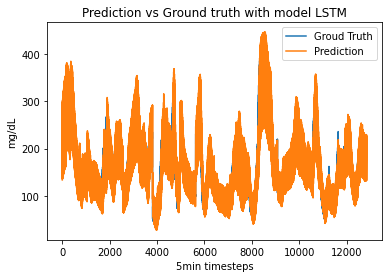

100%|██████████| 2446/2446 [00:06<00:00, 367.43it/s]


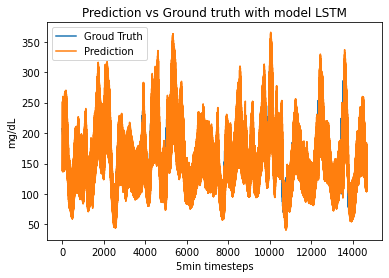

100%|██████████| 2435/2435 [00:07<00:00, 346.71it/s]


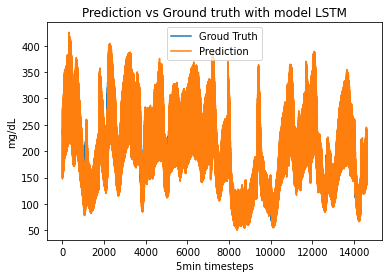

100%|██████████| 2249/2249 [00:07<00:00, 305.35it/s]


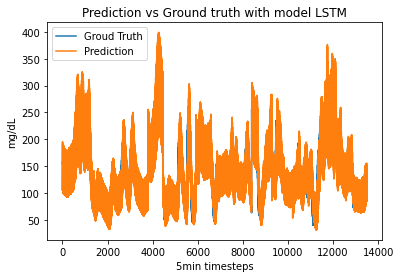

100%|██████████| 2698/2698 [00:07<00:00, 361.36it/s]


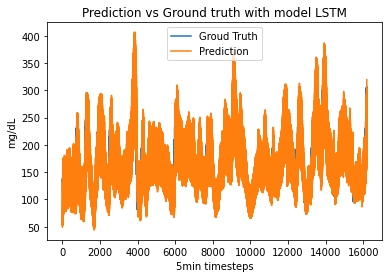

100%|██████████| 2605/2605 [00:07<00:00, 342.51it/s]


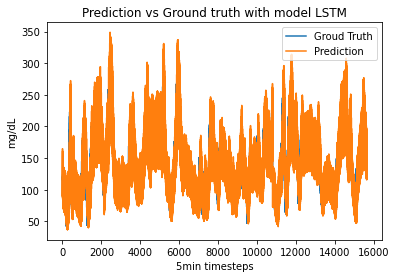

100%|██████████| 2617/2617 [00:06<00:00, 380.03it/s]


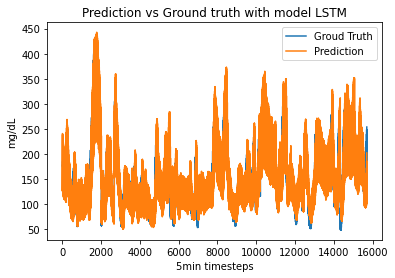

100%|██████████| 2499/2499 [00:06<00:00, 372.67it/s]


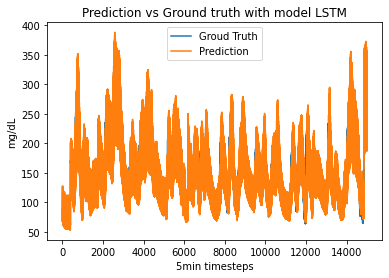

100%|██████████| 2023/2023 [00:05<00:00, 345.75it/s]


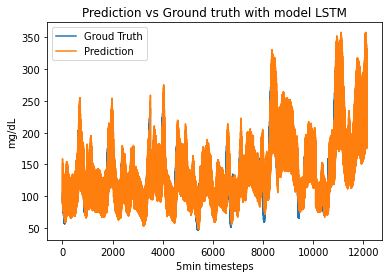

100%|██████████| 2017/2017 [00:05<00:00, 361.12it/s]


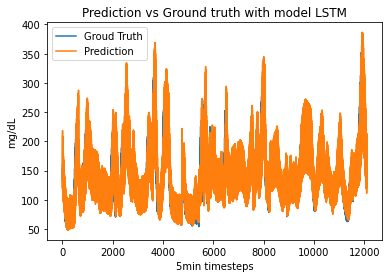

100%|██████████| 2169/2169 [00:05<00:00, 380.85it/s]


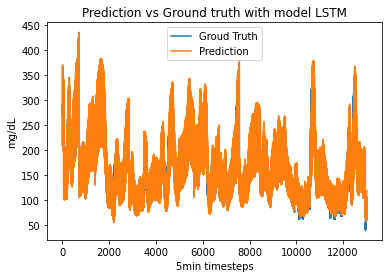

100%|██████████| 2526/2526 [00:06<00:00, 374.86it/s]


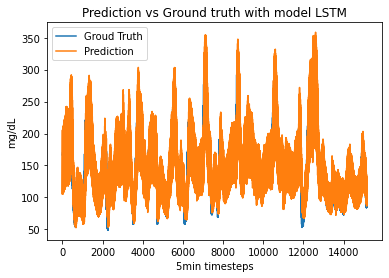

In [16]:
# plot_point([1,2,3,4], [2,3,4,5], "N-BEATS")

for id in patient_ids:
    test_data = OhioData(mode="test", patient_id=id)
    test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
    y_values = []
    y_pred_values = []
    with torch.no_grad():
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device).unsqueeze(2).permute(1, 0, 2).squeeze()
                y_pred = model(x, x[-1].unsqueeze(0)[:, :, 2].unsqueeze(2), teacher_force=False).squeeze()
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                y_values.extend(y.tolist())
                y_pred_values.extend(y_pred.tolist())
                
    fig = plot_point(y_values, y_pred_values, "LSTM")
    plt.show(fig)